In [15]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
import pickle

In [2]:
#df = pd.read_csv('HFER_e2.txt', encoding = "utf-8",index_col = 'Election Date')
df = pd.read_csv('data/HFER_e_lat_lon_qc.csv', encoding = "utf-8",index_col = 'Election Date')

In [3]:
df = df[pd.to_datetime(df.index) > pd.to_datetime('1994-01-01')]
dfq= df[df['Province']=='Quebec']

In [4]:
dfq.head()

Election Type  Parliament Province Riding Last Name  \
Election Date                                                       
1995-02-13              B/P          35   Quebec  brome   Paradis   
1995-02-13              B/P          35   Quebec  brome  Bertrand   
1995-02-13              B/P          35   Quebec  brome     Lever   
1995-02-13              B/P          35   Quebec  brome    Maheux   
1995-02-13              B/P          35   Quebec  brome    Vachon   

                  First Name Gender                Occupation  \
Election Date                                                   
1995-02-13             Denis    NaN                    lawyer   
1995-02-13     Jean-François    NaN  communication consultant   
1995-02-13               Guy    NaN             administrator   
1995-02-13              Line    NaN      marketing consultant   
1995-02-13              Paul    NaN                   retired   

                                  Party  Votes  Votes (%)  Elected        lat  \
Election Date                                                                   
1995-02-13                      Liberal  19078      51.02        1  45.189207   
1995-02-13               Bloc Québécois  15764      42.16        0  45.189207   
1995-02-13     Progressive Conservative   1235       3.30        0  45.189207   
1995-02-13       Reform Party of Canada    517       1.38        0  45.189207   
1995-02-13         New Democratic Party    371       0.99        0  45.189207   

                     lon  
Election Date             
1995-02-13    -72.562857  
1995-02-13    -72.562857  
1995-02-13    -72.562857  
1995-02-13    -72.562857  
1995-02-13    -72.562857

In [5]:
# give number for each major party or other
def partyLabel (row):
    if row['Party']=='Liberal':
        return 0
    elif (row['Party']=='Conservative' or row['Party']=='Progressive Conservative'or
            row['Party']== 'Reform Party of Canada' or row['Party']== 'Reform'or
         row['Party']== 'Canadian Alliance'or row['Party']=='Conservative Party of Canada'):
        return 1
    elif row['Party']=='New Democratic Party' or row['Party']== 'Co-operative Commonwealth Federation':
        return 2
    elif row['Party']=='Green Party of Canada':
        return 3
    elif row['Party']=='Bloc Québécois':
        return 4
    else:
        return 5
dfq['partyLabel']= dfq.apply (lambda row: partyLabel(row), axis=1)

In [6]:
#dataframe with one row per riding per date
dfqUnique=pd.DataFrame(columns=['Election Date', 'Province', 'Riding','Results','lat','lon'])
prevRiding=''
i=0
for date, row in dfq.iterrows():
    if prevRiding != row['Riding']:
        if i>2:
            print( sum(dfqUnique.loc[i]['Results']))
        i+=1
        Results=np.zeros(6)
        Results[row['partyLabel']]+= row['Votes (%)']/100
        dfqUnique.loc[i]=[date] + [row['Province'],row['Riding'],Results,row['lat'],row['lon']]
    elif prevRiding == row['Riding']:
        dfqUnique.loc[i]['Results'][row['partyLabel']]+=row['Votes (%)']/100
    prevRiding=row['Riding']

1.0
1.0
1.0001
1.0001000000000002
0.9999
0.9999
0.9999
1.0
1.0001000000000002
1.0001
0.9999
1.0
1.0
0.9999
1.0000999999999998
1.0
1.0
1.0
0.9998999999999999
0.9999
1.0
1.0
0.9999000000000001
0.9999
0.9999999999999999
1.0001
1.0001
1.0002
0.9999
1.0
0.9999000000000001
1.0
1.0001
0.9998999999999999
1.0
0.9999
1.0
1.0
1.0
1.0001
1.0
1.0
1.0001
1.0
1.0
1.0001000000000002
1.0001
1.0001
0.9999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0001
1.0000999999999998
0.9999
1.0
1.0
0.9999
0.9999
0.9998999999999999
0.9999999999999999
0.9999
1.0001
1.0
0.9999
1.0000000000000002
0.9999999999999999
1.0
1.0
0.9998999999999999
1.0001
0.9999999999999999
1.0
1.0001
1.0001
1.0001
1.0
1.0
0.9999
0.9999
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0001
0.9999999999999999
1.0
0.9999
0.9998999999999999
1.0
0.9999
1.0
0.9999999999999999
0.9999
0.9999
1.0001
0.9999000000000001
1.0000000000000002
1.0
1.0
1.0001
0.9999
1.0001
0.9999
1.0001
0.9999999999999999
1.0
1.0001
1.0001
1.0001
1.0
1.0
1.0
1.0
0.9999000000000

In [7]:
dfqUnique

Election Date Province          Riding  \
1      1995-02-13   Quebec           brome   
2      1995-02-13   Quebec     saint-henri   
3      1996-03-25   Quebec  lac-saint-jean   
4      1996-03-25   Quebec        papineau   
5      1996-03-25   Quebec   saint-laurent   
..            ...      ...             ...   
386    2008-10-14   Quebec       vaudreuil   
387    2008-10-14   Quebec       verchères   
388    2008-10-14   Quebec       westmount   
389    2009-11-09   Quebec       hochelaga   
390    2009-11-09   Quebec       montmagny   

                                               Results        lat        lon  
1    [0.5102, 0.0468, 0.009899999999999999, 0.0027,...  45.189207 -72.562857  
2    [0.7591, 0.060599999999999994, 0.0177, 0.0128,...  45.478460 -73.584618  
3    [0.21539999999999998, 0.014, 0.005, 0.0, 0.765...  48.583336 -72.004880  
4    [0.5920000000000001, 0.034, 0.0347, 0.0, 0.339...  45.852553 -75.141481  
5    [0.7927, 0.0424, 0.0079, 0.0, 0.14859999999999...  45.503270 -73.725448  
..                                                 ...        ...        ...  
386  [0.2133, 0.2369, 0.09630000000000001, 0.0401, ...  45.399423 -74.051462  
387  [0.1634, 0.1426, 0.1545, 0.030899999999999997,...  45.772785 -73.355442  
388  [0.4647, 0.15810000000000002, 0.2293, 0.0704, ...  45.485733 -73.596395  
389  [0.1434, 0.10060000000000001, 0.196, 0.0326, 0...  45.540386 -73.541541  
390  [0.1322, 0.4267, 0.0478, 0.0166, 0.37670000000...  46.982633 -70.555916  

[390 rows x 6 columns]

Presentation for sunday
- 5 min or less
- demo aspect (slide or other)
- 

### Let's try mapping Election Results in 1997

In [8]:
# Default imports
import warnings
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import cartopy.feature as cfeature

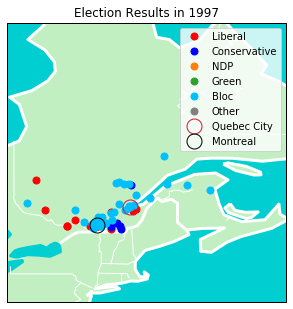

In [10]:
year = '1997'

dfqtmp = dfqUnique[dfqUnique['Election Date'].str.contains(year)]
elected = []
for row in dfqtmp['Results']:
    elected.append(np.argmax(row))
    
dfqtmp['elected'] = elected

# divide winning parties
dfqtmp_0 = dfqtmp[dfqtmp['elected']==0]
dfqtmp_1 = dfqtmp[dfqtmp['elected']==1]
dfqtmp_2 = dfqtmp[dfqtmp['elected']==2]
dfqtmp_3 = dfqtmp[dfqtmp['elected']==3]
dfqtmp_4 = dfqtmp[dfqtmp['elected']==4]
dfqtmp_5 = dfqtmp[dfqtmp['elected']==5]

lat_0, lon_0 = dfqtmp_0['lat'].values, dfqtmp_0['lon'].values
lat_1, lon_1 = dfqtmp_1['lat'].values, dfqtmp_1['lon'].values
lat_2, lon_2 = dfqtmp_2['lat'].values, dfqtmp_2['lon'].values
lat_3, lon_3 = dfqtmp_3['lat'].values, dfqtmp_3['lon'].values
lat_4, lon_4 = dfqtmp_4['lat'].values, dfqtmp_4['lon'].values
lat_5, lon_5 = dfqtmp_5['lat'].values, dfqtmp_5['lon'].values

fig = plt.figure(figsize=(5,10))
ax  = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

title = 'Election Results in '+ year
ax.set_title(title)
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal')
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fname = 'maps_results/election_results_' + year + '.png'
fig.savefig(fname,bbox_inches='tight')

#dfqtmp

### Our 2019 Prediction

In [94]:
A = pd.read_csv('2019electionPrediction.csv', encoding = "utf-8")



In [96]:
A

Unnamed: 0                                            Results        lon  \
0            0  [0.6448648415523123, 0.20719549381305694, 0.03... -77.914273   
1            1  [0.6448648415523123, 0.20719549381305694, 0.03... -77.914273   
2            2  [0.6255882068948209, 0.2622523081843984, 0.032... -73.652702   
3            3  [0.5106154654736534, 0.4213193251794881, 0.000... -71.158938   
4            4  [0.6243926162573318, 0.23217126963619292, 0.05... -74.470787   
..         ...                                                ...        ...   
70          70  [0.5676024090694628, 0.3255682242199664, 0.010... -73.651516   
71          71  [0.5600977346407393, 0.34766171259321943, 0.00... -72.557126   
72          72  [0.605082093669005, 0.2550909529293251, 0.0346... -74.051462   
73          73  [0.6419120932589069, 0.17686418218778885, 0.08... -73.355442   
74          74  [0.6255881416589768, 0.26225233472424814, 0.03... -73.596395   

          lat  
0   48.717724  
1   48.717724  
2   45.559308  
3   46.809689  
4   45.694524  
..        ...  
70  45.708101  
71  46.350800  
72  45.399423  
73  45.772785  
74  45.485733  

[75 rows x 4 columns]

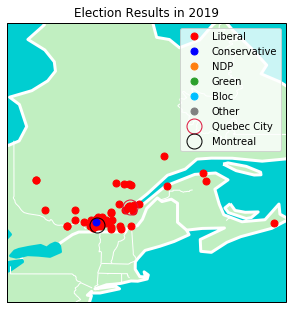

In [103]:
year = '2019'

elected = []
for row in A['Results']:
    elected.append(np.argmax(row))
    
A['elected'] = elected

# divide winning parties
A_0 = A[A['elected']==0]
A_1 = A[A['elected']==1]
A_2 = A[A['elected']==2]
A_3 = A[A['elected']==3]
A_4 = A[A['elected']==4]
A_5 = A[A['elected']==5]

lat_0, lon_0 = A_0['lat'].values, A_0['lon'].values
lat_1, lon_1 = A_1['lat'].values, A_1['lon'].values
lat_2, lon_2 = A_2['lat'].values, A_2['lon'].values
lat_3, lon_3 = A_3['lat'].values, A_3['lon'].values
lat_4, lon_4 = A_4['lat'].values, A_4['lon'].values
lat_5, lon_5 = A_5['lat'].values, A_5['lon'].values

fig = plt.figure(figsize=(5,10))
ax  = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

title = 'Election Results in '+ year
ax.set_title(title)
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal', alpha=1)
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')

# one non-liberal
ax.plot(lon_0[-5], lat_0[-5], '.', markersize=14,color='blue')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fname = 'maps_results/election_results_' + year + '.png'
fig.savefig(fname,bbox_inches='tight')

### Outliers Plot

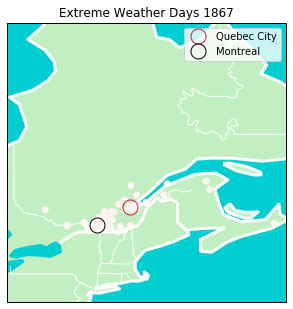

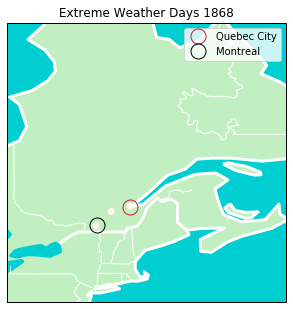

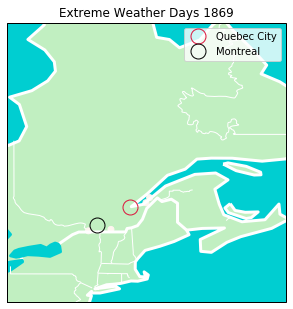

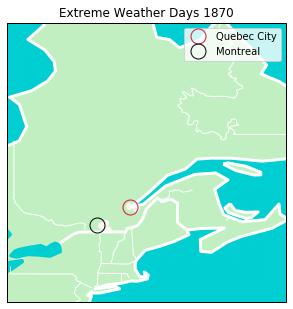

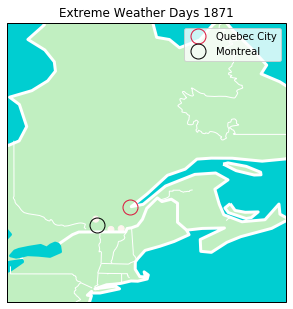

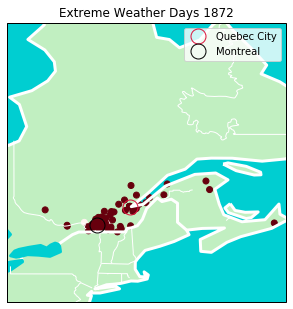

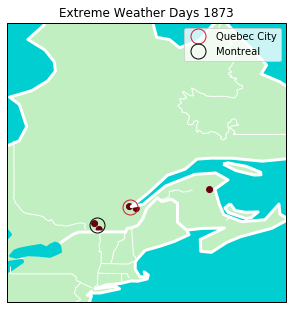

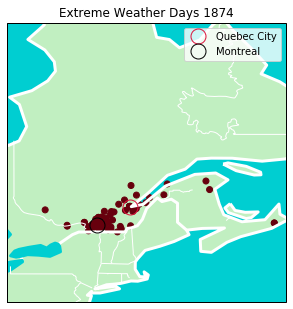

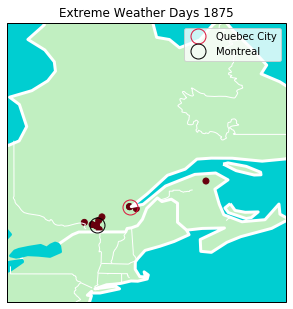

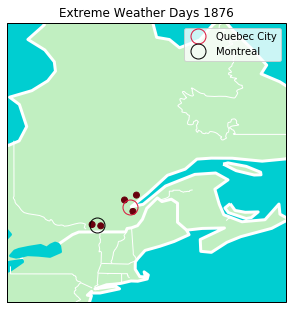

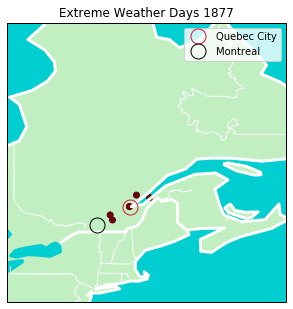

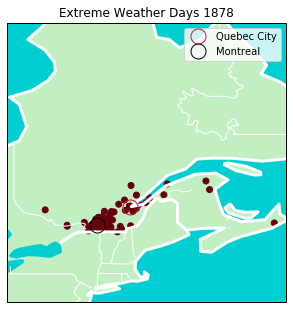

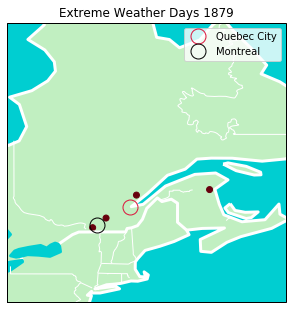

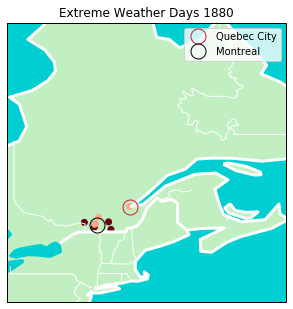

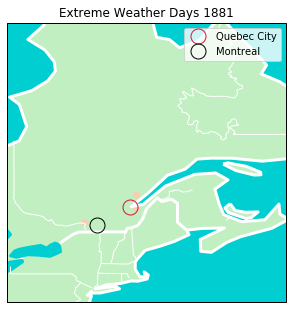

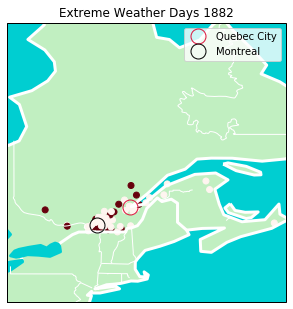

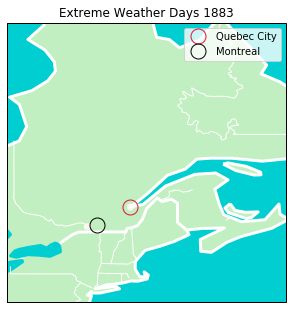

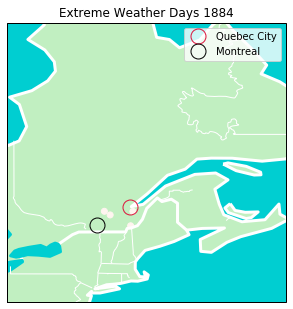

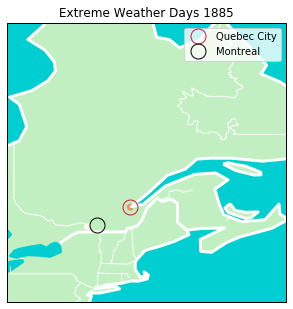

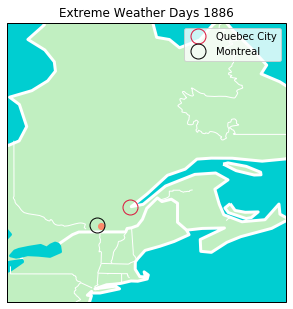

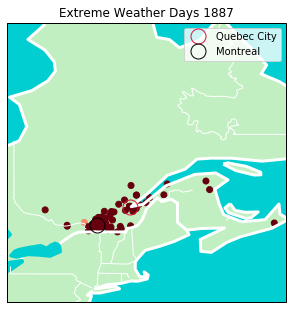

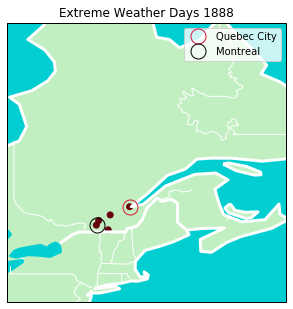

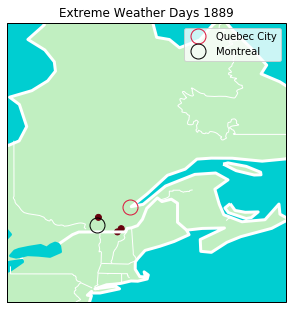

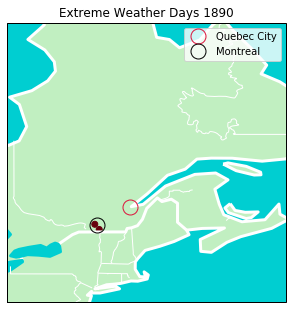

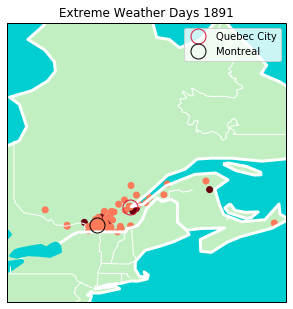

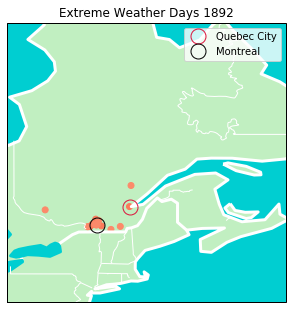

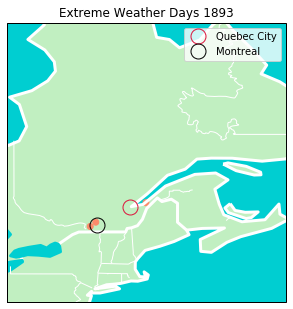

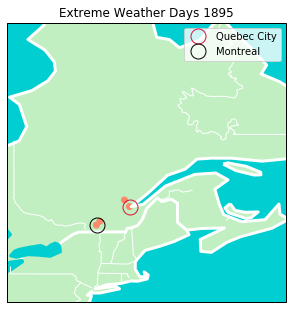

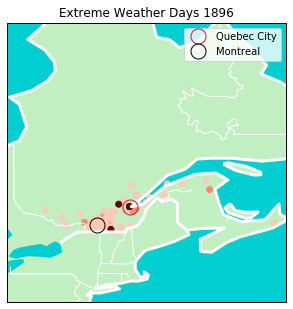

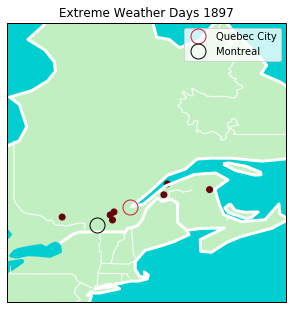

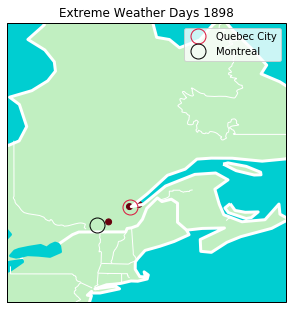

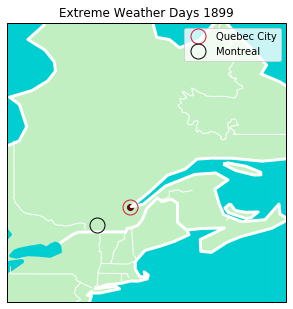

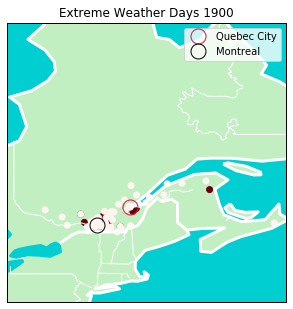

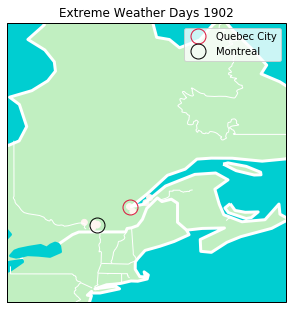

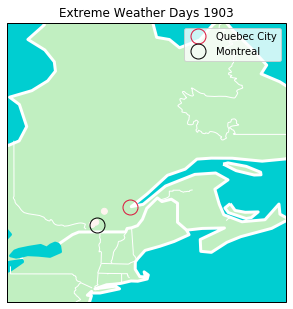

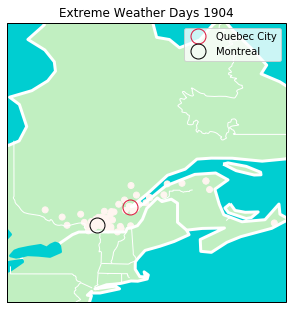

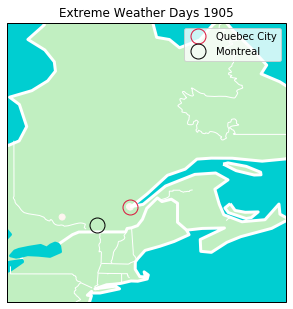

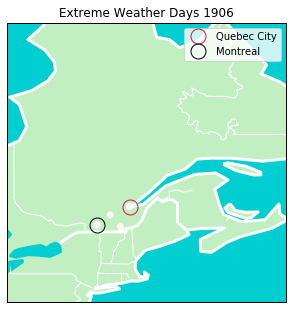

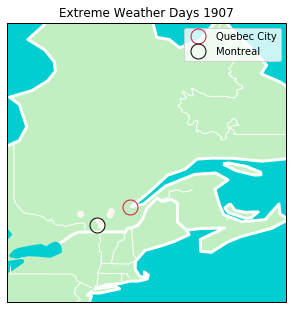

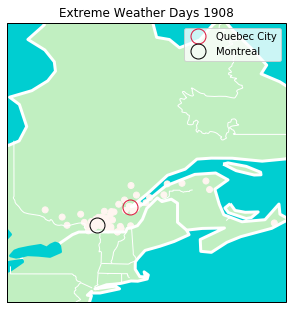

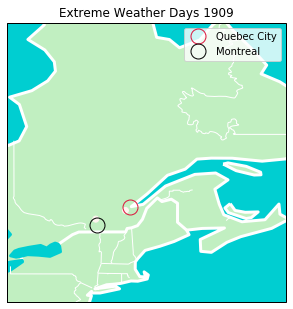

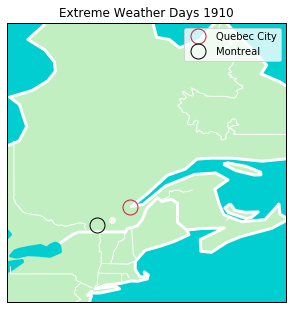

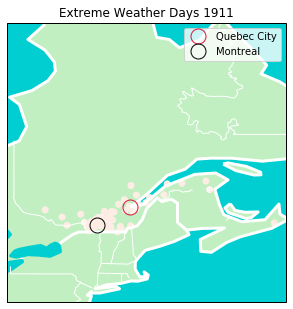

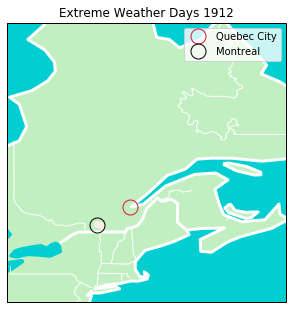

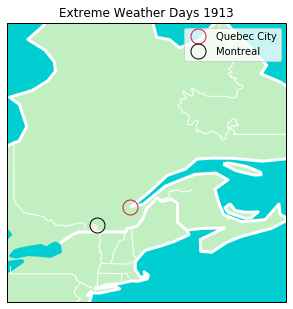

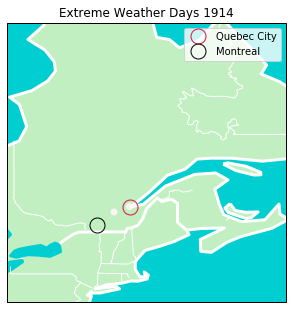

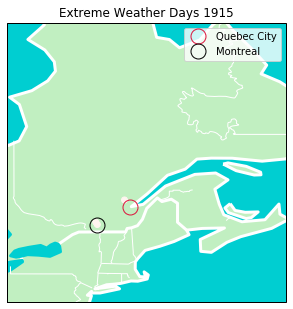

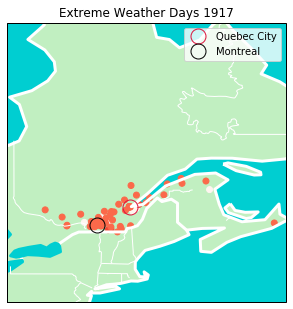

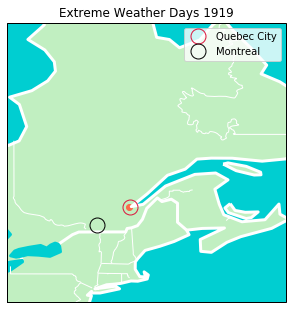

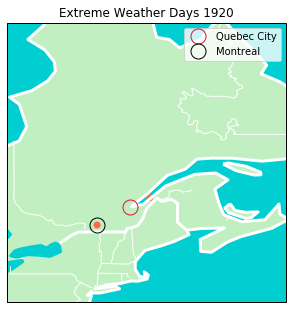

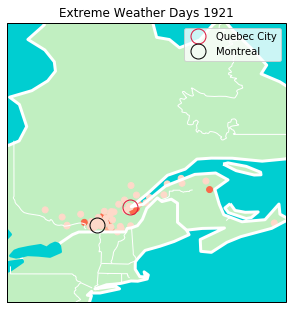

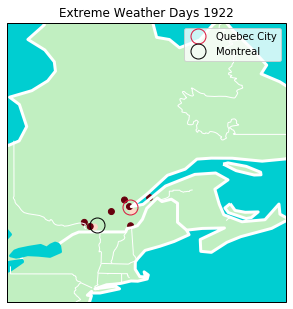

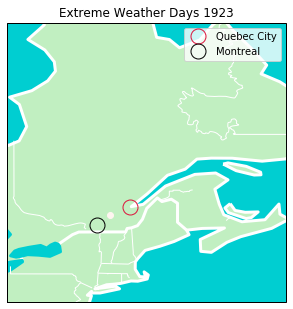

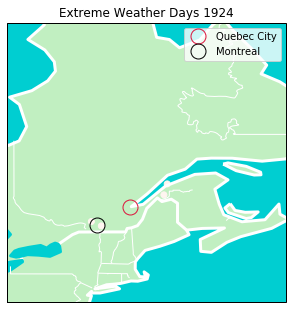

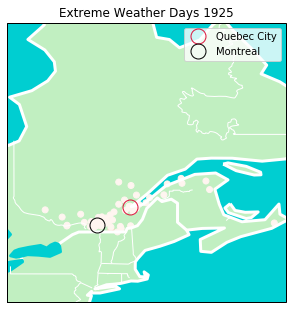

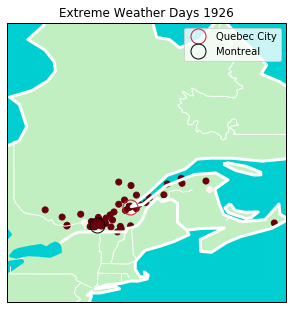

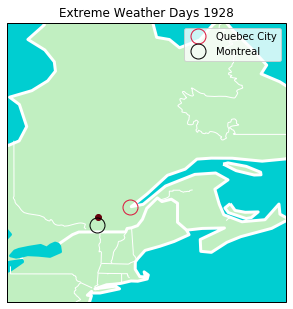

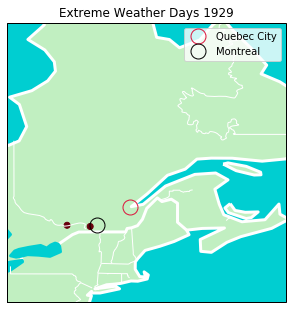

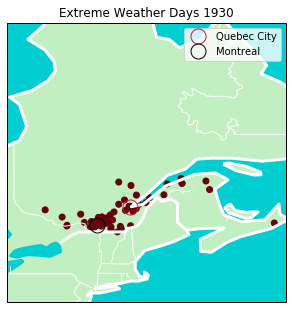

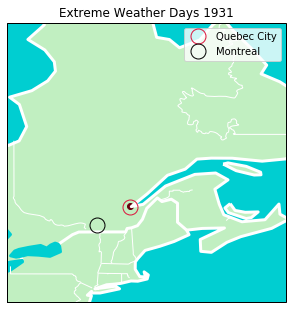

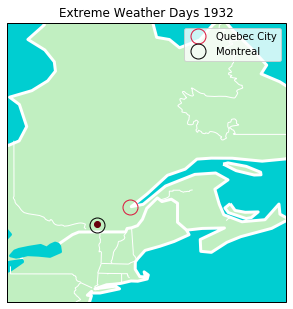

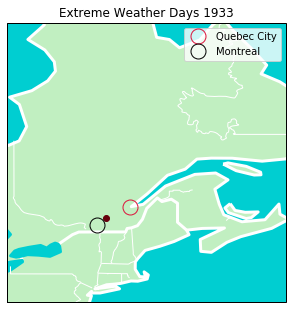

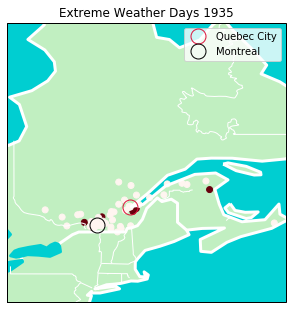

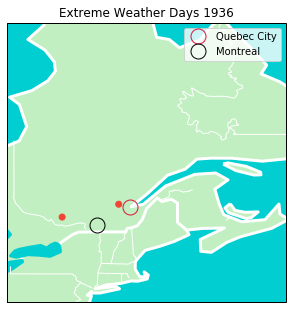

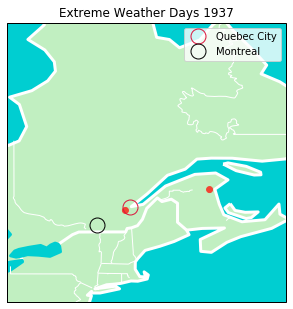

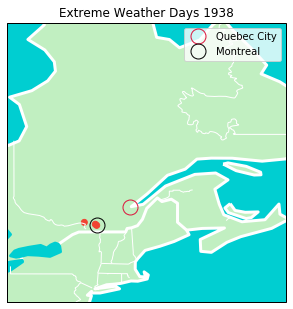

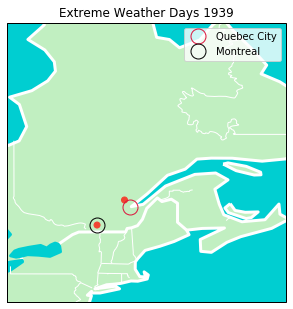

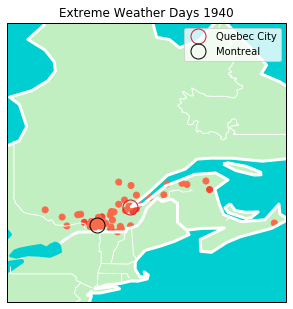

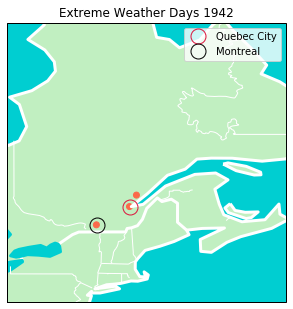

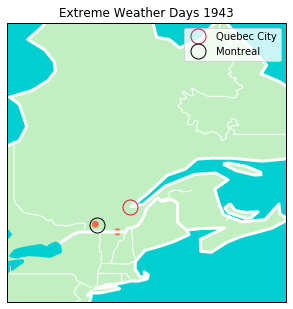

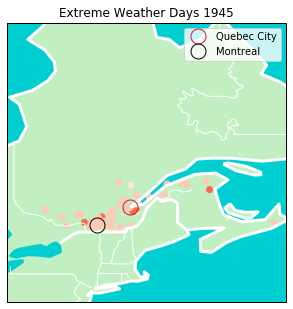

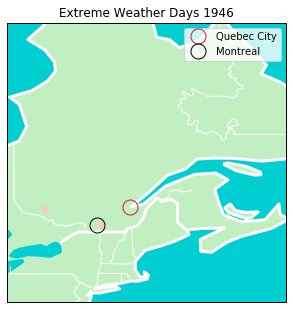

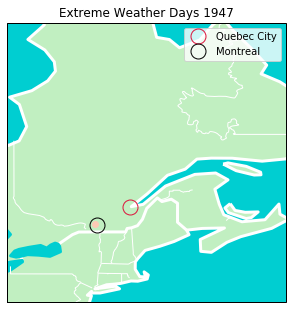

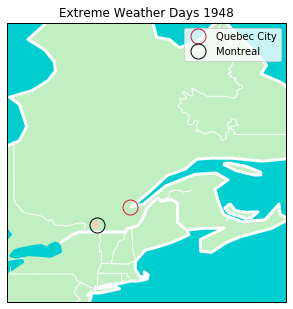

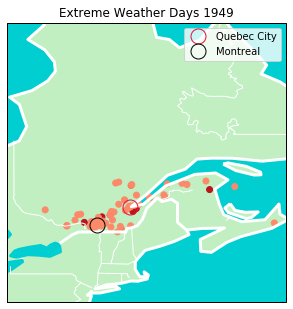

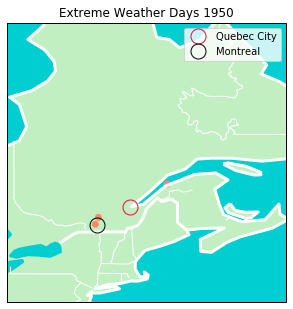

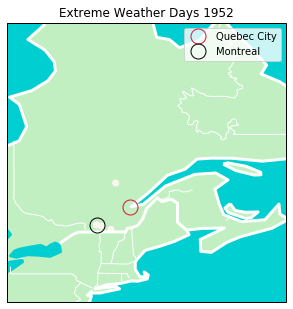

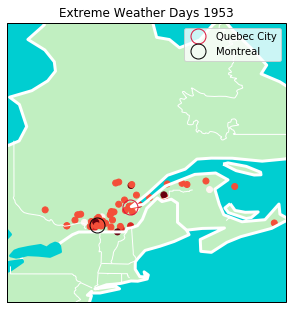

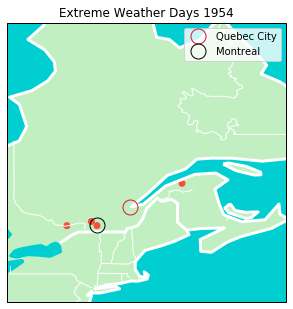

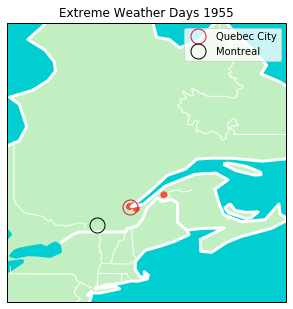

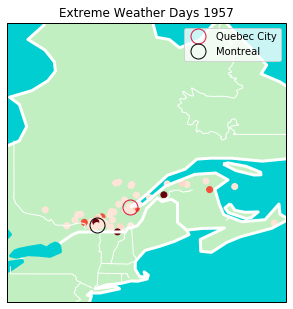

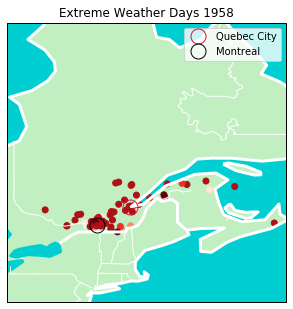

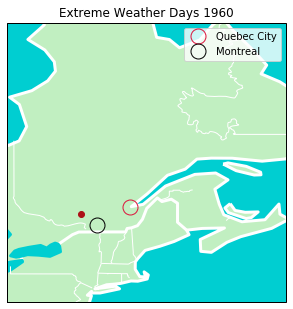

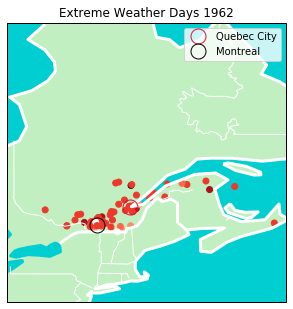

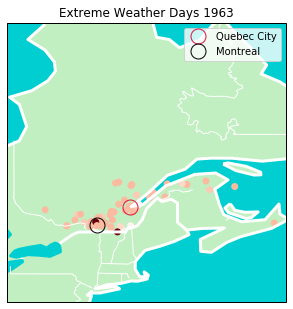

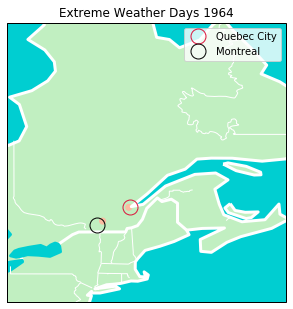

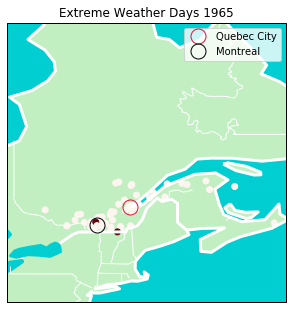

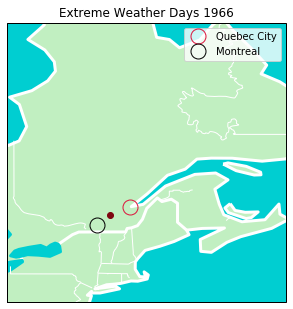

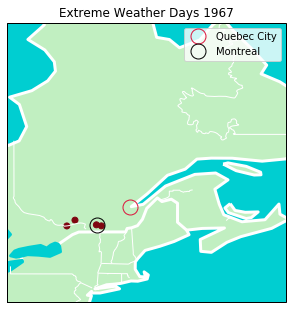

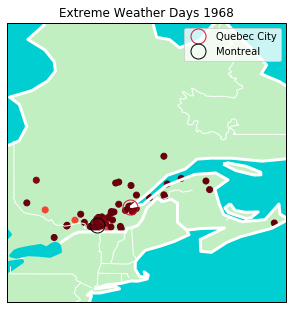

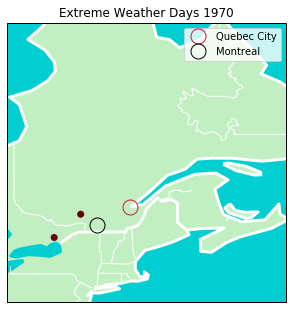

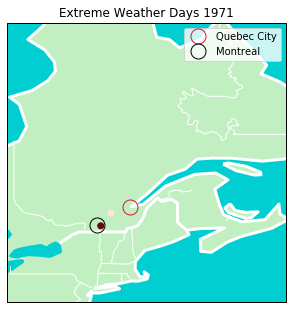

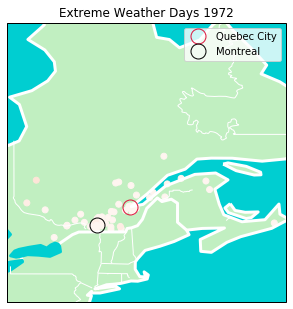

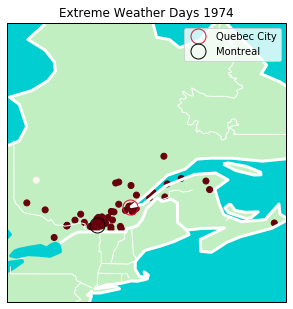

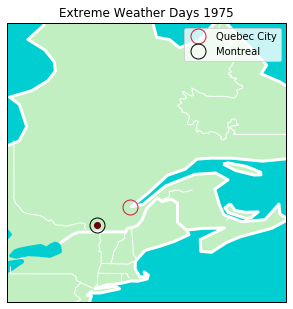

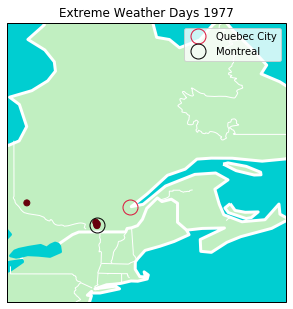

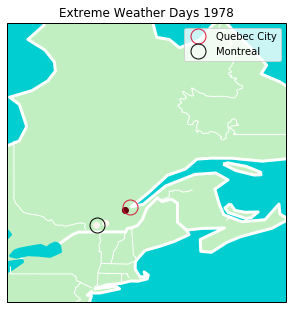

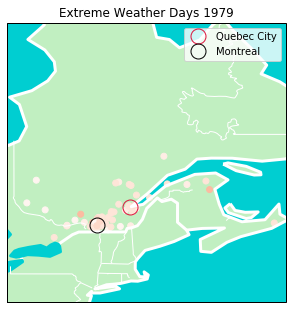

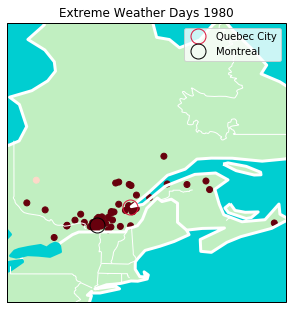

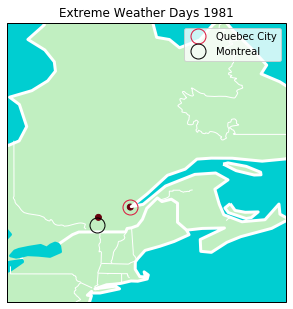

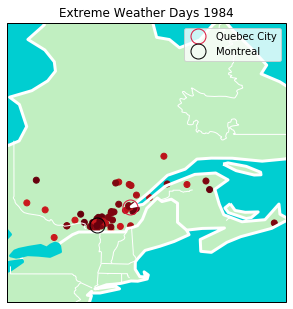

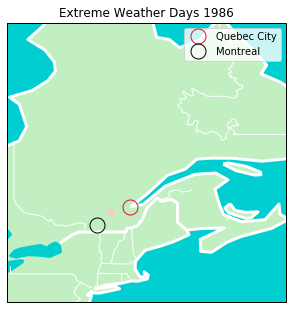

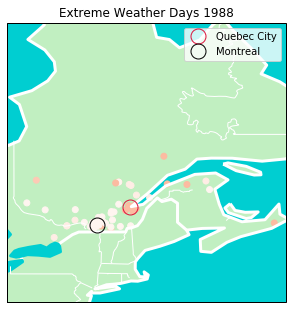

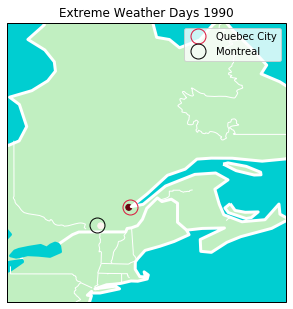

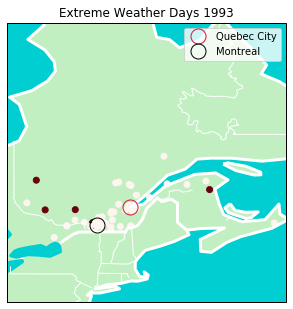

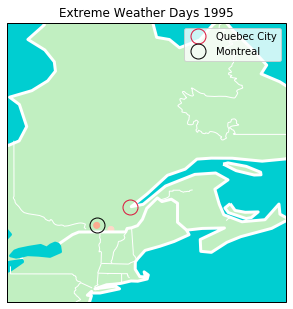

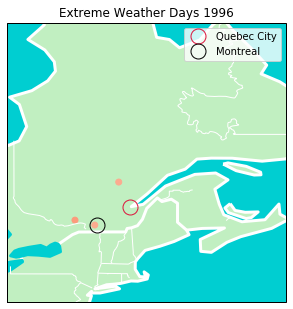

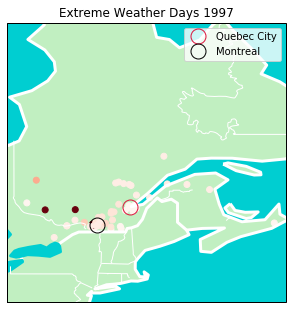

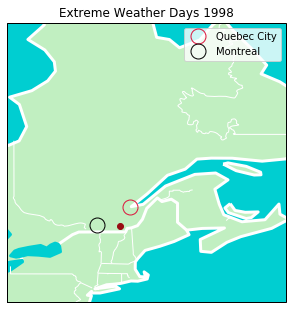

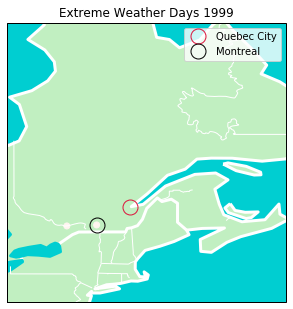

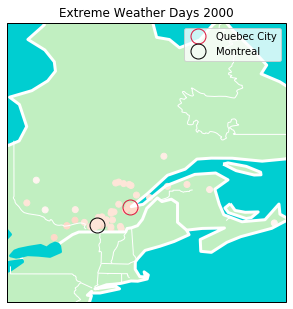

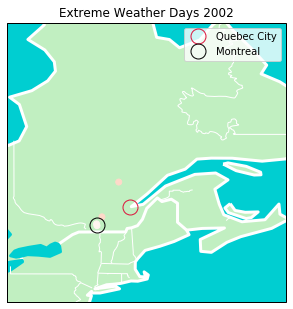

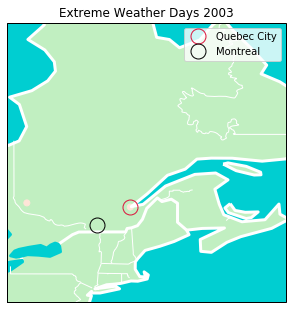

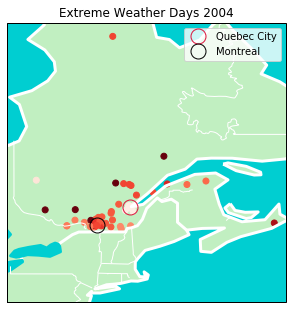

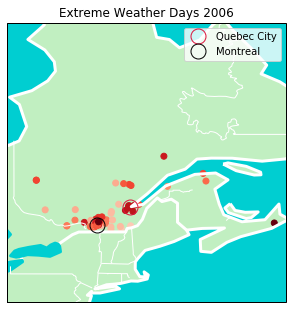

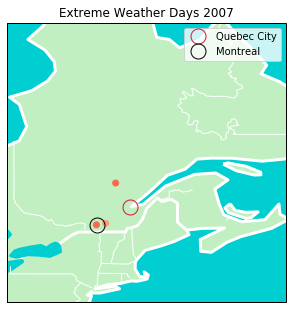

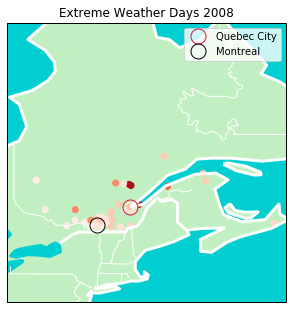

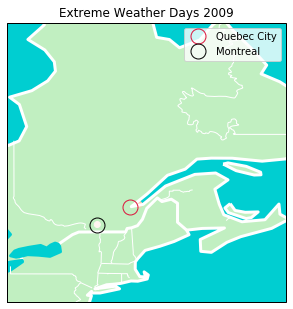

In [87]:

map_data = np.load("data/election_year_climate_outliers.npy")

for year in np.unique(map_data[:,0]):
    mask = map_data[:,0] == year
    lons = map_data[mask][:,1]
    lats = map_data[mask][:,2]
    c1 = map_data[mask][:,3] # number of outliers weather
    c2 = map_data[mask][:,4] # distance from 99th 
    c3 = map_data[mask][:,5]
    
    # plot
    fig = plt.figure(figsize=(5,10))
    ax  = fig.add_subplot(1, 1, 1,
                          projection=ccrs.PlateCarree())
    
    title = 'Extreme Weather Days '+ str(int(year))
    ax.set_title(title)
    ax.scatter(lons, lats, c=c1, vmin=0, vmax=20, cmap='Reds')
    
    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none')
    ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
    ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
    ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
    ax.add_feature(cfeature.OCEAN, color='darkturquoise')
    ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
    ax.add_feature(states_provinces, edgecolor='white')

    ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
    ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')

    ax.set_xlim(-80,-60)
    ax.set_ylim(40,60)
    ax.legend(loc=1)
    # fig.colorbar()
    fname = 'maps_results/weather_outliers_'+str(int(year))+'.png'
    fig.savefig(fname, bbox_inches='tight')

In [52]:
map_data = np.load("data/election_year_climate_outliers.npy")

for year in np.unique(map_data[:,0]):
    mask = map_data[:,0] == year
    lons = map_data[mask][:,1]
    lats = map_data[mask][:,2]
    c1 = map_data[mask][:,3] # number of outliers weather
    c2 = map_data[mask][:,4] # distance from 99th 
    c3 = map_data[mask][:,5]
    
title = 'Election Results in '+ year
ax.set_title(title)
ax.plot(lon_0, lat_0, '.', markersize=14,color='red', label='Liberal')
ax.plot(lon_1, lat_1, '.', markersize=14,color='blue', label='Conservative')
ax.plot(lon_2, lat_2, '.', markersize=14,color='C1', label='NDP')
ax.plot(lon_3, lat_3, '.', markersize=14,color='C2', label='Green')
ax.plot(lon_4, lat_4, '.', markersize=14,color='deepskyblue', label='Bloc')
ax.plot(lon_5, lat_5, '.', markersize=14,color='gray', label='Other')
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(cfeature.LAND, color='limegreen', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=3)
ax.add_feature(cfeature.OCEAN, color='darkturquoise')
ax.add_feature(cfeature.LAKES, color='darkturquoise', edgecolor='white', linewidth=3)
ax.add_feature(states_provinces, edgecolor='white')

ax.plot(-71.2080, 46.8139,'o', markersize=15, fillstyle='none', color='crimson', label='Quebec City')
ax.plot(-73.5673, 45.5017,'o', markersize=15, fillstyle='none', color='black', label='Montreal')
#ax.text(46.8139, 71.2080° W'Quebec City')

ax.set_xlim(-80,-60)
ax.set_ylim(40,60)
ax.legend(loc=1)
fname = 'maps_results/election_results_' + year + '.png'
fig.savefig(fname,bbox_inches='tight')


In [53]:
c1

array([0., 4.])

In [57]:
c2

array([6.695     , 2.71426966])

In [56]:
c2

array([6.695     , 2.71426966])

In [29]:
# load pickle
X, y = pickle.load(open('all-qc-input-outputs-date-location.pkl', 'rb'))

# y is the election results 1867-2009
elected = []
for row in :
    print(row)
    #elected.append(np.argmax(row))

0
1
2
3
4
5


In [33]:
np.argmax(y.iloc[0,:])

5

In [32]:
y

0       1       2       3       4       5
Election Date                                                
1867-08-07     0.0000  0.0000  0.0000  0.0000  0.0000  1.0000
1867-08-07     0.0000  0.5653  0.0000  0.0000  0.0000  0.4347
1867-08-07     0.6523  0.0000  0.0000  0.0000  0.0000  0.3477
1867-08-07     0.0000  0.5117  0.0000  0.0000  0.0000  0.4883
1867-08-07     0.0000  0.5943  0.0000  0.0000  0.0000  0.4057
...               ...     ...     ...     ...     ...     ...
2008-10-14     0.2133  0.2369  0.0963  0.0401  0.4134  0.0000
2008-10-14     0.1634  0.1426  0.1545  0.0309  0.5085  0.0000
2008-10-14     0.4647  0.1581  0.2293  0.0704  0.0726  0.0050
2009-11-09     0.1434  0.1006  0.1960  0.0326  0.5116  0.0157
2009-11-09     0.1322  0.4267  0.0478  0.0166  0.3767  0.0000

[3114 rows x 6 columns]

### Average Result when all weather variables are extreme

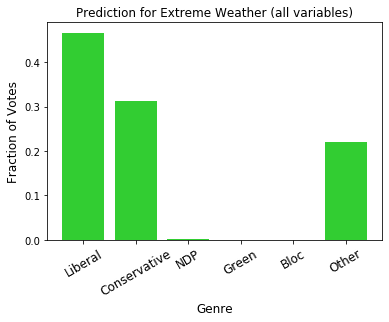

In [47]:
label = ['Liberal','Conservative','NDP','Green','Bloc','Other'] 
no_movies = [0.46606325083091765, 0.3127278897013869, 
             0.0018767777993793924, 5.104286406077053e-06, 
             4.386784698959057e-07, 0.21932653870344013]
plt.figure()
index = np.arange(len(label))
plt.bar(index, no_movies, color='limegreen')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Fraction of Votes', fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title('Prediction for Extreme Weather (all variables)')
plt.savefig('maps_results/Average_result_all.png', bbox_inches='tight')

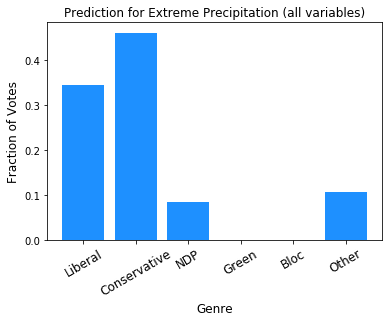

In [48]:
no_movies = [0.34493268493318485, 0.4615133166114414, 
             0.08539106645503419, 0.0005815410896557042, 
             9.85420196506609e-06, 0.1075715367087188]
plt.figure()
index = np.arange(len(label))
plt.bar(index, no_movies, color='dodgerblue')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Fraction of Votes', fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title('Prediction for Extreme Precipitation (all variables)')
plt.savefig('maps_results/Average_result_precipitation.png', bbox_inches='tight')

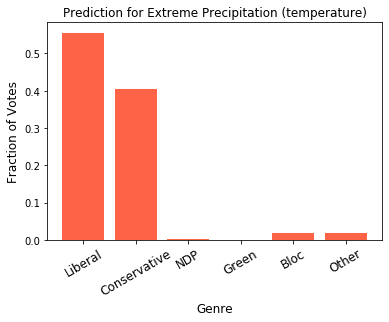

In [50]:
no_movies = [0.5554261673410824, 0.40457970002392446, 
             0.003633611201767658, 0.00036159076355780304, 
             0.017599446438662392, 0.01839948423100523]

plt.figure()
index = np.arange(len(label))
plt.bar(index, no_movies, color='tomato')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Fraction of Votes', fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title('Prediction for Extreme Precipitation (temperature)')
plt.savefig('maps_results/Average_result_temp.png', bbox_inches='tight')

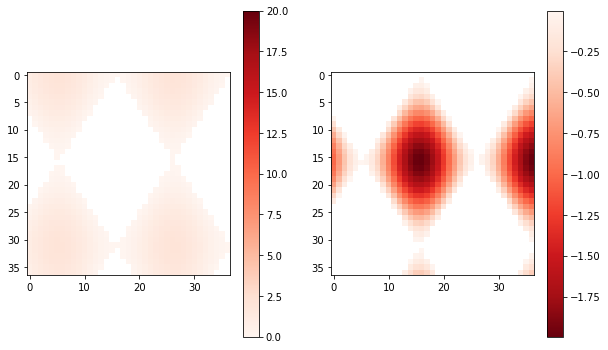

In [105]:
N = 37
x, y = np.mgrid[:N, :N]
Z = (np.cos(x*0.2) + np.sin(y*0.3))

# mask out the negative and positve values, respectively
Zpos = np.ma.masked_less(Z, 0)
Zneg = np.ma.masked_greater(Z, 0)

fig, (ax1, ax2) = plt.subplots(figsize=(10, 6), ncols=2)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax1.imshow(Zpos, cmap='Reds', interpolation='none', vmin=0, vmax =20)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax1)

# repeat everything above for the the negative data
neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
fig.colorbar(neg, ax=ax2)

plt.show()